# 小例子

refs:

    https://blog.csdn.net/sinat_26917383/article/details/84345407
    

In [5]:
from ipywidgets import interact, widgets

## 基础组件

### button 按钮

In [7]:
widgets.Button(
    description='Click me',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)

# 调整按钮
#from ipywidgets import Button, Layout

#b = Button(description='(50% width, 80px height) button',
#           layout=Layout(width='50%', height='80px'),
#          button_style='success')
#b

Button(button_style='success', description='Click me', icon='check', style=ButtonStyle(), tooltip='Click me')

### IntSlider、FloatSlider

一个整数型滑块，一个数值型滑块。

In [8]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0, readout_format='.1f')

### FloatProgress / IntProgress

In [9]:
widgets.IntProgress(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

widgets.FloatProgress(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Loading:',
    bar_style='info',
    orientation='horizontal'
)

IntProgress(value=7, description='Loading:', max=10)

FloatProgress(value=7.5, bar_style='info', description='Loading:', max=10.0)

### Text、Textarea

一般来说，textarea比text更好用，模块是可伸缩的。

In [10]:
widgets.Text(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False
)


widgets.Textarea(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False
)

Text(value='Hello World', description='String:', placeholder='Type something')

Textarea(value='Hello World', description='String:', placeholder='Type something')

### 图片Image

In [11]:
file = open("images/WidgetArch.png", "rb")
image = file.read()
widgets.Image(
    value=image,
    format='png',
    width=300,
    height=400,
)

FileNotFoundError: [Errno 2] No such file or directory: 'images/WidgetArch.png'

## 单控件 - interact 简单交互

interact代表交互，第一个f代表函数，segx与opt都代表f函数的参数。

segx代表滑条
opt = True/False代表选项框

注意interact，相当于给函数f赋值，除了第一个，之后的参数都是第一个函数的参数，名字需对齐。

In [12]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(segx,opt):
    if opt:
        return segx
    else:
        return 1
interact(f, segx=10, opt = True)

interactive(children=(IntSlider(value=10, description='segx', max=30, min=-10), Checkbox(value=True, descripti…

<function __main__.f(segx, opt)>

## 单控件 - interact_manual简单交互

In [13]:
from ipywidgets import FloatSlider
# 横轴进度可以拖拽
def slow_function(i):
    print(int(i),list(x for x in range(int(i)) if
                str(x)==str(x)[::-1] and
                str(x**2)==str(x**2)[::-1]))
    return

interact_manual(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5));

interactive(children=(FloatSlider(value=100000.0, description='i', max=10000000.0, min=100000.0, step=100000.0…

FloatSlider表示拖拽滑块，interact_manual(函数，函数参数)，此时函数参数是由拖拽滑块FloatSlider来确定。

<span class="burk">与interact的区别</span>：
interact是实时改变，interact_manual是人工点击RUN才能执行一次。

## 单控件 - interactive_output + HBox交互

In [14]:
from IPython.display import display, HTML
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()
ui = widgets.HBox([a, b, c])

def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

Output()

a,b,c是三个滑块，通过widgets.HBox进行拼接成为一个Box组件。

interactive_output（函数，函数参数），函数参数是一个组合Box组件。

display是展示滑块组合以及输出项。

## 单控件 - 文本交互

Textarea是一个比较长的文本框作为输入项。

In [15]:
widgets.Textarea(
    value='Hello World',          # 默认语句
    placeholder='Type something',
    description='String:',        # 框的名字
    disabled=False                # 是否可修改
)

Textarea(value='Hello World', description='String:', placeholder='Type something')

## 两个控件 - 组合交互jslink

In [16]:
# jslink
# 两个控件的交互
a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)

mylink = widgets.jslink((a, 'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

jslink把控件a,b组合起来，a是文本控件，b是数值控件。

## 多模块
### 控件独立分屏Accordion

In [18]:
accordion = widgets.Accordion(children=[widgets.Text(), widgets.Text()])
accordion.set_title(0, 'Text1')
accordion.set_title(1, 'Text2')
accordion

Accordion(children=(Text(value=''), Text(value='')), _titles={'0': 'Text1', '1': 'Text2'})

可以把两个组件独立的链接在一起，而不是如jslink交互影响。

### 双模块分屏 + 选项分屏

In [20]:
# 选项分屏
tab_contents = ['P0', 'P1', 'P2', 'P3', 'P4']
children = [widgets.Text(description=name) for name in tab_contents]
tab = widgets.Tab()
tab.children = children
for i in range(len(children)):
    tab.set_title(i, str(i))
tab

### 双模块分屏 + 选项分屏

In [22]:
tab_nest = widgets.Tab()
tab_nest.children = [accordion, accordion]
tab_nest.set_title(0, 'An accordion')
tab_nest.set_title(1, 'Copy of the accordion')
tab_nest

多个控件组合独立分开

## 小案例

### 图形 + 滑块

#### 案例一

In [24]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))     
# m代表范围
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

### 案例二

interact_manual是单控件函数交互，此时通过装饰器，interact_manual（函数，函数参数）中的函数被隐去。

In [26]:
@widgets.interact_manual(
    color=['blue', 'red', 'green'], lw=(1., 10.))
def plot(freq=1., color='blue', lw=2, grid=True):
    t = np.linspace(-1., +1., 1000)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(t, np.sin(2 * np.pi * freq * t),
            lw=lw, color=color)
    ax.grid(grid)

interactive(children=(FloatSlider(value=1.0, description='freq', max=3.0, min=-1.0), Dropdown(description='col…

### 一个可控的进度读条

Play是一个控制按钮，FloatProgress是一个数值进度条。
通过jslink将两个空间链接，点击按钮就Loading就可以开始走动。

In [27]:
# 一个可控的进度条
play = widgets.Play(
#     interval=10,
    value=0,
    min=0,
    max=100,
    step=1,
    description="Press play",
    disabled=False
)
#slider = widgets.IntSlider()
slider = widgets.FloatProgress(
    value=50,
    min=0,
    max=100.0,
    step=1,
    description='Loading:',
    bar_style='success',
    orientation='horizontal'
)

widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

### 颜色筛选器

In [36]:
# 颜色选择器
widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

ColorPicker(value='blue', description='Pick a color')

### 复杂输入框

In [38]:
# 复合功能
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Age of the captain'), IntSlider(min=40, max=60)], layout=form_item_layout),
    Box([Label(value='Egg style'),
         Dropdown(options=['Scrambled', 'Sunny side up', 'Over easy'])], layout=form_item_layout),
    Box([Label(value='Ship size'),
         FloatText()], layout=form_item_layout),
    Box([Label(value='Information'),
         Textarea()], layout=form_item_layout)
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form

Box(children=(Box(children=(Label(value='Age of the captain'), IntSlider(value=40, max=60, min=40)), layout=La…

form_item_layout统一的Box布局，
Dropdown是下拉框，一个Box是一个独立组件。
form_items是多个Box的组合，Box( [Label(),Textarea()] , layout ) => Box( [前缀名,控件函数] , 布局 )

# lineup_widget

这是一个专门为展示dataframe + ipywidgets而来的包。

## 安装
+ install Jupyter Widgets

pip install ipywidgets

jupyter nbextension enable --py widgetsnbextension

+ install library

pip install lineup_widget

jupyter nbextension enable --py --sys-prefix lineup_widget

## 主函数

w = lineup_widget.LineUpWidget(df, options=dict(rowHeight=20))


In [1]:
_data = list(trait=dict(), default_value=[]).tag(sync=True)
_columns = list(trait=dict(), default_value=[]).tag(sync=True)
options = dict(
    traits=dict(filterGlobally=Bool(), singleSelection=Bool(), noCriteriaLimits=Bool(), animated=Bool(),
                             sidePanel=Enum((True, False, 'collapsed')), summaryHeader=Bool(), overviewMode=Bool(),
                             hierarchyIndicator=Bool(), labelRotation=Int(), ignoreUnsupportedBrowser=Bool(),
                             rowHeight=Int(), rowPadding=Int(), groupHeight=Int(), groupPadding=Int(),
                             expandLineOnHover=Bool(), defaultSlopeGraphMode=Enum(('item', 'band'))),
                 default_value=dict(filterGlobally=True, singleSelection=False, noCriteriaLimits=False, animated=True,
                                    sidePanel='collapsed', summaryHeader=True, overviewMode=False,
                                    hierarchyIndicator=True, labelRotation=0, ignoreUnsupportedBrowser=False,
                                    rowHeight=18, rowPadding=2, groupHeight=40, groupPadding=5,
                                    expandLineOnHover=False, defaultSlopeGraphMode='item'
                                    )).tag(sync=True)
rankings = List(trait=Dict(traits=dict(columns=List(trait=Union((Unicode(), Dict()))), sort_by=List(trait=Unicode()),
                                         group_by=List(trait=Unicode())),
                             default_value=dict(columns=['_*', '*'], sort_by=[], group_by=[])), default_value=[]).tag(
    sync=True)

TypeError: list() takes no keyword arguments

其中options之中有非常多的参数，由于文档也没具体说明，笔者这边只对几个参数有了解。
其中：sidePanel=Enum((True, False, 'collapsed'))代表侧边的面板是否打开，笔者觉得很碍人，一般是sidePanel = False

### 案例一

In [1]:
import lineup_widget
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))

w = lineup_widget.LineUpWidget(df)
w.on_selection_changed(lambda selection: print(selection))
w

LineUpWidget(value=[], layout=Layout(align_self='stretch', height='600px'), options={'filterGlobally': True, '…

非常简单，唯一需要整理的就是df，一个DataFrame的格式作为输入，其他不用调整任何东西，就可以使用了。

### 案例二

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, interact_manual

def selection_changed(selection):
    return df.iloc[selection]

interact(selection_changed, selection=lineup_widget.LineUpWidget(df))

interactive(children=(LineUpWidget(value=[], description='selection', layout=Layout(align_self='stretch', heig…

<function __main__.selection_changed(selection)>

### 案例三: ipywidgets与lineup_widget共同使用的案例

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, HTML

def view(down,std):
    df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))
    
    if down == 'overall':
        df =df 
    elif down == 'part':
        df = df[['A','B']]
    
    if std:
        display(df)
    else:
        w = lineup_widget.LineUpWidget(df, options=dict(rowHeight=50,sidePanel = False))
        display(w)
    return


down = widgets.Dropdown(
    options=['overall','part'],
    value='overall',
    description='类型:',
    disabled=False,
)

interactive(view, down = down , std = True)

interactive(children=(Dropdown(description='类型:', options=('overall', 'part'), value='overall'), Checkbox(valu…

## 案例四

In [3]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

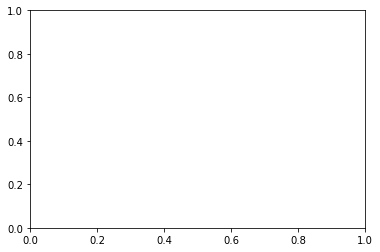

In [4]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
# fig, axes = plt.subplots(nrows=1, ncols=1)
# fig, axes = plt.subplots()
fig = plt.gcf()
axes = fig.add_subplot()


def f(m, b):
    global axes
    plt.sca(axes)  # ******** 如果不进行选择画在哪个axis上，则不能显示话出来的内容 ********
    # axes.clear()  # 如果去掉，则在原图上一直累加显示
    axes.cla()  # 也可以
    x = np.linspace(-10, 10, num=1000)
    axes.plot(x, m * x + b)
    axes.set_ylim(-5, 5)
    # plt.show()  # 要不要都没关系
    # fig.canvas.draw()  # 要不要都没关系


interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
# output = interactive_plot.children[-1]
# output.layout.height = '350px'
interactive_plot